# Conceptual Understanding of Pandas Data Structures

In [1]:
dict_students = {
    "harry" : {
        "Name":"Harry","Last Name":"Potter","Branch":"ECE","Hobbies":[
            "Football"]
    },
    "harmoine" : {
        "Name":"Harmoine","Last Name":"Grenger","Branch":"ECE","Hobbies":[
            "Reading"]
    },
    "ron" : {
        "Name":"Harry","Last Name":"Potter","Branch":"ECE","Hobbies":[
            "Chess","Reading"]
    }
}

In [3]:
dict_students

{'harry': {'Name': 'Harry',
  'Last Name': 'Potter',
  'Branch': 'ECE',
  'Hobbies': ['Football']},
 'harmoine': {'Name': 'Harmoine',
  'Last Name': 'Grenger',
  'Branch': 'ECE',
  'Hobbies': ['Reading']},
 'ron': {'Name': 'Harry',
  'Last Name': 'Potter',
  'Branch': 'ECE',
  'Hobbies': ['Chess', 'Reading']}}

In [9]:
student_name = "harry"
attribute = "Branch"
dict_students[student_name][attribute]

'ECE'

# Pandas Datastructures

## Dataframe

In [11]:
import pandas as pd

In [13]:
df_student = pd.DataFrame()
df_student['Name'] = ['Harry Potter','Ronald Weasley','Harmoine Grenger']
df_student['Branch'] = ['ECE','CSE','ECE']
df_student['Hobbies'] = ['Football','Chess','Reading']

In [15]:
df_student

,Name,Branch,Hobbies
0,Harry Potter,ECE,Football
1,Ronald Weasley,CSE,Chess
2,Harmoine Grenger,ECE,Reading


## Series

In [ ]:
ser_1 = pd.Series(['Draco','Civil','Bowling,Horse Riding'],index = ['Name','Branch','Hobbies'])
ser_1

In [ ]:
df_student.append(ser_1,ignore_index= True)

# Load DataSet

In [19]:
import os

In [23]:
df_chipo = pd.read_csv('./datasets/chipotle.tsv',sep = '\t')

In [29]:
df_chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


# Data Inspection

In [31]:
df_chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [33]:
df_chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [41]:
df_chipo["item_price"].value_counts()

item_price
$8.75      730
$11.25     521
$9.25      398
$4.45      349
$8.49      311
          ... 
$13.35       1
$7.50        1
$4.36        1
$11.80       1
$11.49       1
Name: count, Length: 78, dtype: int64

# Filter/Select the Data

* loc
* iloc

In [47]:
df_chipo.loc[1:10,["quantity","item_name"]]

,quantity,item_name
1,1,Izze
2,1,Nantucket Nectar
3,1,Chips and Tomatillo-Green Chili Salsa
4,2,Chicken Bowl
5,1,Chicken Bowl
6,1,Side of Chips
7,1,Steak Burrito
8,1,Steak Soft Tacos
9,1,Steak Burrito
10,1,Chips and Guacamole


In [53]:
df_chipo_mod = df_chipo.set_index("order_id")

In [55]:
df_chipo_mod.head()

,quantity,item_name,choice_description,item_price
order_id,,,,
1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,Izze,[Clementine],$3.39
1,1,Nantucket Nectar,[Apple],$3.39
1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [57]:
df_chipo_mod.columns

Index(['quantity', 'item_name', 'choice_description', 'item_price'], dtype='object')

In [59]:
df_chipo_mod.loc[1:10,["quantity","item_price"]]

,quantity,item_price
order_id,,
1,1,$2.39
1,1,$3.39
1,1,$3.39
1,1,$2.39
2,2,$16.98
3,1,$10.98
3,1,$1.69
4,1,$11.75
4,1,$9.25


In [63]:
df_chipo_mod.iloc[1:10,[0,1]]

,quantity,item_name
order_id,,
1,1,Izze
1,1,Nantucket Nectar
1,1,Chips and Tomatillo-Green Chili Salsa
2,2,Chicken Bowl
3,1,Chicken Bowl
3,1,Side of Chips
4,1,Steak Burrito
4,1,Steak Soft Tacos
5,1,Steak Burrito


## Filtering using Conditions

In [65]:
df_chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [71]:
df_chipo[df_chipo["quantity"]>2]

,order_id,quantity,item_name,choice_description,item_price
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",$32.94
445,193,3,Bowl,"[Braised Carnitas, Pinto Beans, [Sour Cream, C...",$22.20
689,284,3,Canned Soft Drink,[Diet Coke],$3.75
818,338,3,Bottled Water,NaN,$3.27
850,350,3,Canned Soft Drink,[Sprite],$3.75
917,379,3,Canned Soft Drink,[Lemonade],$3.75
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$35.00
1255,511,3,Steak Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$27.75
1257,511,4,Chips and Fresh Tomato Salsa,NaN,$11.80
1425,577,4,Bottled Water,NaN,$6.00


In [ ]:
df[df['quantity'] > 2].head(10)

In [ ]:
df[(df['quantity']> 2) & (df['item_name'] == 'Canned Soft Drink')]
# df[(df['quantity']> 2) and (df['item_name'] == 'Canned Soft Drink')]

In [ ]:
df.loc[df['item_name'].isin(['Bottled Water','Canned Soft Drink']),['quantity','item_price']].head(10)

In [ ]:
df.loc[df['item_name'].str.startswith('Veggie'),['quantity','item_price','item_name']].head(10)

# Operations on DataFrame


In [79]:
df_chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [95]:
df_chipo["item_price_num"]=pd.to_numeric(
    df_chipo["item_price"]
    .str
    .split("$",expand=True)
    [1]
)

In [99]:
df_chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   object 
 5   item_price_num      4622 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 216.8+ KB


In [101]:
df_chipo["item_price"].apply(lambda x : float(x.split("$")[1]))

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [103]:
df_chipo["total_price"] = (
    df_chipo["item_price_num"]*
    df_chipo["quantity"]
)
df_chipo.head()

,order_id,quantity,item_name,choice_description,item_price,item_price_num,total_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98,33.96


In [ ]:
df["price_modified"] = df["item_price"].apply(lambda x: float(x.strip("$")))

In [ ]:
df.sort_values(by = 'quantity',ascending=False).head(10)#.tail(10)

In [ ]:
df.sort_values(by = 'item_price',ascending = False).head(10)

In [ ]:
item_price_mod = df['item_price'].apply(lambda x : float(x.strip('$')))
item_price_mod
df['item_price_mod'] = item_price_mod
df.head()

In [ ]:
df['gst_price'] = df['item_price_mod'] * 0.18 + df['item_price_mod']
df.head(10)

In [ ]:
df['revenue'] = df['item_price_mod']*df['quantity']
df.head()

# INDEXES

In [ ]:
# Using the books dataframe for this section
df = df_books
df.head()

In [ ]:
df.index

In [ ]:
df.tail(10)

In [ ]:
%%time 
df[df['authors'] =='David C. Hendrickson']

In [ ]:
s = df.set_index('authors').sort_index()

In [ ]:
s.head(5)

In [ ]:
%%time
s.loc['David C. Hendrickson']

In [ ]:
df.head()

p_i = df.set_index(['authors','title']).sort_index()
p_i

# GroupBy

In [26]:
df_drinks = pd.read_csv("drinks.csv",index_col = 0)

In [28]:
df_drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [34]:
df_drinks["continent"].value_counts()

continent
AF    53
EU    45
AS    44
OC    16
SA    12
Name: count, dtype: int64

## Analyze for each season ,how were the most of the matches won, on basis of batting strength or bowling strength

In [36]:
df_cricket = pd.read_csv("cricket_result.csv")

In [38]:
df_cricket["win_by_runs"]

0       NaN
1      40.0
2       NaN
3      13.0
4      38.0
       ... 
741     NaN
742    78.0
743     NaN
744     NaN
745    57.0
Name: win_by_runs, Length: 746, dtype: float64

In [40]:
df_cricket.loc[~df_cricket["win_by_runs"].isna(),"won_by"] = "bat"

In [42]:
df_cricket["won_by"] = df_cricket["won_by"].fillna("field")

In [44]:
wb = df_cricket.groupby(by = ['season','won_by'])['winner'].count()

<Axes: xlabel='season'>

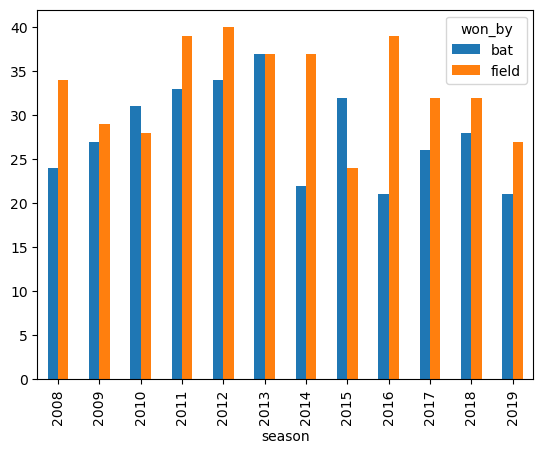

In [46]:
wb.unstack(1).plot(kind='bar')

In [48]:
df_cricket.groupby(by = ['season','won_by'])['winner'].count()

season  won_by
2008    bat       24
        field     34
2009    bat       27
        field     29
2010    bat       31
        field     28
2011    bat       33
        field     39
2012    bat       34
        field     40
2013    bat       37
        field     37
2014    bat       22
        field     37
2015    bat       32
        field     24
2016    bat       21
        field     39
2017    bat       26
        field     32
2018    bat       28
        field     32
2019    bat       21
        field     27
Name: winner, dtype: int64

In [ ]:
df_cricket.groupby(by = ['season','won_by'])['winner'].count()
# wb.unstack(1).plot(kind='bar')

## How many won the toss as well as the match 


In [ ]:
toss_team = df[df['toss_winner']==df['winner']]
td = toss_team.groupby(by = ['season','toss_decision'])['winner'].count()
td

td.unstack(1).plot(kind='bar')

## Analyze for a particular venue and team

In [ ]:
df = df_cricket

In [ ]:
df[df["winner"]=="Royal Challengers Bangalore"]

In [ ]:
rcb_win = df[df['winner']=='Royal Challengers Bangalore']
rcb_t = rcb_win.groupby(by = ['season','won_by','venue'])['winner'].count()
rcb_t
rcb_home = rcb_t.unstack(2)#.plot(kind = 'bar')
rcb_home.loc[:,'M Chinnaswamy Stadium'].unstack(1).plot(kind = 'bar')

## Analyse the venue 

In [ ]:
venue = df[df['venue']=='Eden Gardens']
venue_g = venue.groupby(by = ['season','won_by'])['winner'].count()
venue_g.unstack(1).plot(kind = 'bar')

# Plotting

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

## Univariant scatter plot

In [ ]:
tips = df_tips
tips.head()

In [ ]:
fig = plt.figure()
axes_tips = fig.add_subplot(1,1,1)
tips.hist(column='total_bill',bins=10,ax=axes_tips)
# axes_tips.hist(tips['total_bill'], bins=10)
axes_tips.set_title('Histogram of Total Bill')
axes_tips.set_xlabel('Total Bill')
axes_tips.set_ylabel('Frequency')

## Bivariant Statistical Plot

In [ ]:
scatter_plot = plt.figure()
axes_bi = scatter_plot.add_subplot(1,1,1)
tips.plot(x='total_bill',y='tip',kind = 'scatter',ax=axes_bi,s = tips['size']*10)
# axes_bi.scatter(tips['total_bill'],tips['tip'])
axes_bi.set_xlabel('Total Bill')
axes_bi.set_ylabel('Tips')
axes_bi.set_title('Scatterplot of Total Bill vs Tip')

## Box Plot

In [ ]:
boxplot = plt.figure()
axes_box = boxplot.add_subplot(1,1,1)
# axes_box.boxplot([tips[tips['sex'] =='Female']['tip'],tips[tips['sex']=='Male']['tip']],labels=['Female','Male'])
tips.boxplot(column='total_bill',by='sex',ax=axes_box)
boxplot.add_axes(axes_box)
axes_box.set_xlabel('Sex')
axes_box.set_ylabel('Tip')
axes_box.set_title('Boxplot of Tips by Sex')
boxplot.suptitle('')

In [ ]:
tips.groupby(by=['sex']).mean()\
.plot.pie(y = 'total_bill')